# 1.12 / 1.13

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_delta_t(delta_x, buffer):
    return 0.5 * np.square(delta_x) * buffer

### Initialization

In [2]:
space_steps = 101
    
delta_x = 1/(space_steps - 1)
delta_y = 1/(space_steps - 1)
delta_t = get_delta_t(delta_x, 0.5)

time_step_space = 0.01

time_steps = int(np.ceil(time_step_space / delta_t))

current_temperature = np.zeros((space_steps, space_steps))
next_temperature = np.zeros((space_steps, space_steps))
plot_data_beginning = []
plot_data_half = []
plot_data_end = []

alpha_x = delta_t / delta_x**2
alpha_y = delta_t / delta_y**2

#set boundaries
for x in range(space_steps):
    for y in range(space_steps):
        current_temperature[x][y] = x**2 + y**2
        next_temperature[x][y] = x**2 + y**2
        
for i in range(space_steps):
    current_temperature[0][i] = i**2
    current_temperature[1][i] = 1 + i**2
    current_temperature[i][0] = i**2
    current_temperature[i][1] = 1 + i**2
    
    next_temperature[0][i] = i**2
    next_temperature[1][i] = 1 + i**2
    next_temperature[i][0] = i**2
    next_temperature[i][1] = 1 + i**2

current_temperature = current_temperature / np.max(current_temperature)
next_temperature = next_temperature / np.max(next_temperature)

plot_data_beginning = current_temperature.copy()

### Heat simulation

In [3]:
for t in range(time_steps):
    for i in range(1, space_steps - 1):
        for j in range(1, space_steps - 1):
            next_temperature[i][j] = current_temperature[i][j] + (delta_t/np.square(delta_x) * (current_temperature[i + 1][j] - 2 * current_temperature[i][j] + current_temperature[i - 1][j])) + \
                (delta_t/np.square(delta_y) * (current_temperature[i][j + 1] - 2 * current_temperature[i][j] + current_temperature[i][j - 1]))
                
    current_temperature = next_temperature.copy()
    
    if(t == time_steps/2):
        plot_data_half = current_temperature.copy()

plot_data_end = current_temperature.copy()

### 3D Plot at the beginning

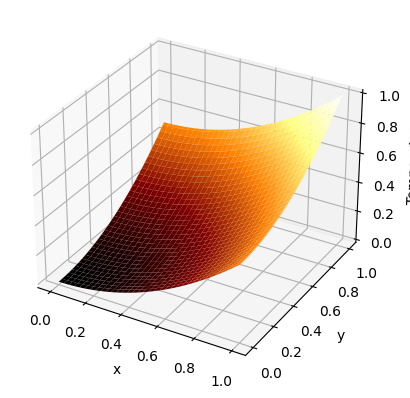

In [4]:
data_np = np.array(plot_data_beginning)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, space_steps)
y = np.linspace(0, 1, space_steps)
xg, yg = np.meshgrid(x, y)
ax.plot_surface(xg, yg, data_np, cmap='afmhot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
plt.show()

### 3D Plot after half the time

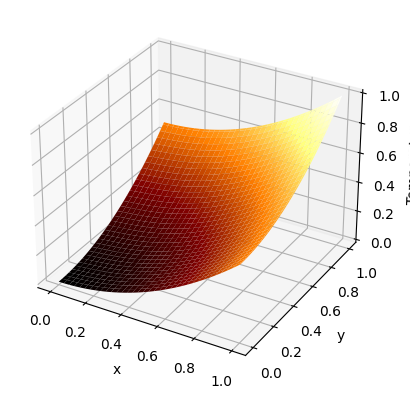

In [5]:
data_np = np.array(plot_data_half)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, space_steps)
y = np.linspace(0, 1, space_steps)
xg, yg = np.meshgrid(x, y)
ax.plot_surface(xg, yg, data_np, cmap='afmhot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
plt.show()

### 3D Plot at the end of the time

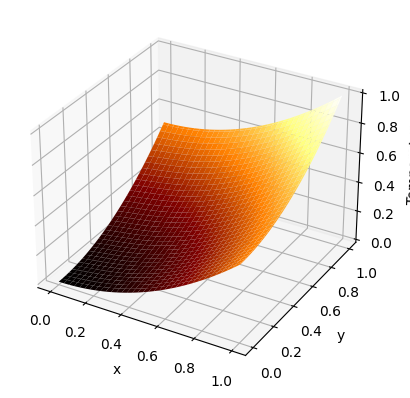

In [6]:
data_np = np.array(plot_data_end)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, space_steps)
y = np.linspace(0, 1, space_steps)
xg, yg = np.meshgrid(x, y)
ax.plot_surface(xg, yg, data_np, cmap='afmhot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
plt.show()